In [62]:
!pip3 install googledrivedownloader

In [0]:
import numpy as np
from numpy.linalg import eigh
from numpy.matlib import repmat
from sklearn.datasets import make_moons
from scipy.linalg import fractional_matrix_power
import cv2

import matplotlib.pyplot as plt
%matplotlib inline
from google_drive_downloader import GoogleDriveDownloader

In [0]:

GoogleDriveDownloader.download_file_from_google_drive(file_id='1OOsfISGs9K0cefqXMcaQVLcRkEcwEW2K',
                                                      dest_path='./img/clustering.zip',
                                                      unzip=True)


def gaussians_dataset(n_gaussian, n_points, mus, stds):
    """
    Provides a dataset made by several gaussians.

    Parameters
    ----------
    n_gaussian : int
        The number of desired gaussian components.
    n_points : list
        A list of cardinality of points (one for each gaussian).
    mus : list
        A list of means (one for each gaussian, e.g. [[1, 1], [3, 1]).
    stds : list
        A list of stds (one for each gaussian, e.g. [[1, 1], [2, 2]).

    Returns
    -------
    tuple
        a tuple like:
            data ndarray shape: (n_samples, dims).
            class ndarray shape: (n_samples,).
    """

    assert n_gaussian == len(mus) == len(stds) == len(n_points)

    data = []
    cl = []
    for i in range(0, n_gaussian):

        mu = mus[i]
        std = stds[i]
        n_pt = n_points[i]

        cov = np.diag(std)

        data.append(np.random.multivariate_normal(mu, cov, size=n_pt))
        cl.append(np.ones(shape=n_pt) * i)

    data = np.concatenate(data, axis=0)
    cl = np.concatenate(cl, axis=0)

    return data, cl


def two_moon_dataset(n_samples=100, shuffle=True, noise=None, random_state=None):
    """
    Make two interleaving half circles

    A simple toy dataset to visualize clustering and classification
    algorithms.

    Parameters
    ----------
    n_samples : int, optional (default=100)
        The total number of points generated.

    shuffle : bool, optional (default=True)
        Whether to shuffle the samples.

    noise : double or None (default=None)
        Standard deviation of Gaussian noise added to the data.

    Read more in the :ref:`User Guide <sample_generators>`.

    Returns
    -------
    X : array of shape [n_samples, 2]
        The generated samples.

    y : array of shape [n_samples]
        The integer labels (0 or 1) for class membership of each sample.
    """
    return make_moons(n_samples, shuffle, noise, random_state)


def spirals(n_points, noise=.5):
    """
    Makes two interleaved spirals

    Parameters
    ----------
    n_points: int
        number of points for each spiral
    noise: float
        the amount of dispersion of each spiral

    Returns
    -------
    X : array of shape [n_samples, 2]
        The generated samples.

    y : array of shape [n_samples]
        The integer labels (0 or 1) for class membership of each sample.
    """

    n = np.sqrt(np.random.rand(n_points, 1)) * 780 * (2 * np.pi) / 360
    d1x = -np.cos(n) * n + np.random.rand(n_points, 1) * noise
    d1y = np.sin(n) * n + np.random.rand(n_points, 1) * noise
    return (np.vstack((np.hstack((d1x, d1y)), np.hstack((-d1x, -d1y)))),
            np.hstack((np.zeros(n_points), np.ones(n_points))))


In [0]:
def kmeans(data, n_cl, verbose=True):
    """
    Kmeans algorithm.
    
    Parameters
    ----------
    data: ndarray
        data to partition, has shape (n_samples, dimensionality).
    n_cl: int
        number of clusters.
    verbose: bool
        whether or not to plot assignment at each iteration (default is True).

    Returns
    -------
    ndarray
        computed assignment. Has shape (n_samples,)
    """
    n_samples, dim = data.shape
    
    # YOUR CODE GOES HERE!!!!
    # -------------------------------------------------------
    # Replace this line with the actual kmeans implementation
    result = np.random.randint(0, n_cl, n_samples)
    # -------------------------------------------------------

    return result


In [0]:
def main_kmeans_gaussian():
    """
    Main function to run kmeans the synthetic gaussian dataset.
    """

    # generate the dataset
    data, cl = gaussians_dataset(3, [100, 100, 70], [[1, 1], [-4, 6], [8, 8]], [[1, 1], [3, 3], [1, 1]])

    # visualize the dataset
    fig, ax = plt.subplots(1, 2)
    ax[0].scatter(data[:, 0], data[:, 1], c=cl, s=40, cmap='jet')

    # solve kmeans optimization
    labels = kmeans(data, n_cl=3, verbose=True)

    # visualize results
    ax[1].scatter(data[:, 0], data[:, 1], c=labels, s=40, cmap='jet')


def main_kmeans_img(img_path):
    """
    Main function to run kmeans for image segmentation.
    
    Parameters
    ----------
    img_path: str
        Path of the image to load and segment.

    Returns
    -------
    None
    """

    # load the image
    img = np.float32(cv2.imread(img_path))
    h, w, c = img.shape

    # visualize image
    fig, ax = plt.subplots(1, 2)
    ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB).astype(np.uint8))
    ax[0].axis('off')

    # add coordinates
    row_indexes = np.arange(0, h)
    col_indexes = np.arange(0, w)
    coordinates = np.zeros(shape=(h, w, 2))
    coordinates[..., 0] = repmat(row_indexes, w, 1).T
    coordinates[..., 1] = repmat(col_indexes, h, 1)

    data = np.concatenate((img, coordinates), axis=-1)
    data = np.reshape(data, newshape=(w * h, 5))

    # solve kmeans optimization
    labels = kmeans(data, n_cl=2, verbose=False)
    ax[1].imshow(np.reshape(labels, (h, w)), cmap='hot')
    ax[1].axis('off')

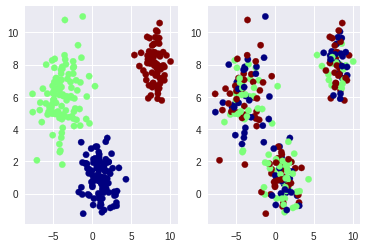

In [68]:
    #main_kmeans_img('img/emma.png')
    main_kmeans_gaussian()